In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

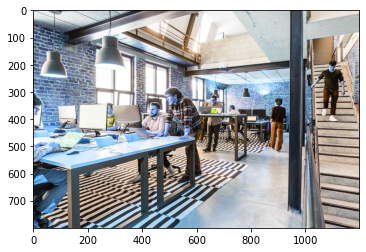

In [2]:
image = cv2.imread('D:\image.jpg',1)
original_image = image.copy()
plt.imshow(image)

In [3]:
rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [4]:
net = cv2.dnn.readNet('yolov3.weights','yolov3.cfg')

In [5]:
# load classes from coco 
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
    #classes = f.read().splitlines()

In [6]:
layer_names = net.getLayerNames()

In [7]:
output_layer = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
output_layer

['yolo_82', 'yolo_94', 'yolo_106']

In [8]:
height,width,depth = rgb_image.shape
print(height,width,depth)

800 1200 3


In [9]:
blob = cv2.dnn.blobFromImage(rgb_image, 0.003, (512,512),(0,0,0), True)

In [10]:
net.setInput(blob)
outs = net.forward(output_layer)

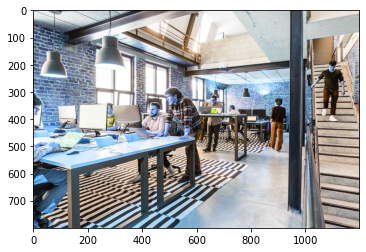

In [11]:
boxes = []
confidences = []
class_ids = []

for out in outs:
    for det in out:
        scores = det[5:] # starting from 6th element to the end
        # scores --> array used to store all the 80 classes prediction
        class_id = np.argmax(scores) 
        confidence = scores[class_id] 
        if confidence > 0.6:
            cx = int(det[0]*width)
            cy= int(det[1]*height)
            
            w = int(det[2]*width)
            h = int(det[3]*height)
            
            #x = int(cx -w/2)
            #y = int(cx -h/2)
            
            x,y = int(cx-w/2), int(cy-h/2)
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            
            #cv2.rectangle()
plt.imshow(image)

In [12]:
n_det = len(boxes)
print(n_det)
print(boxes)
print(class_ids)
print(classes[62])
print(classes[0])

21
[[449, 277, 205, 334], [453, 283, 188, 352], [1016, 182, 130, 224], [1025, 184, 136, 218], [1019, 196, 126, 215], [1025, 202, 134, 204], [94, 345, 70, 77], [165, 342, 104, 98], [161, 341, 114, 100], [167, 342, 121, 100], [294, 345, 109, 82], [401, 334, 84, 123], [398, 339, 89, 126], [387, 343, 105, 123], [858, 324, 65, 190], [853, 328, 77, 185], [473, 264, 150, 357], [854, 328, 77, 195], [475, 285, 149, 348], [501, 292, 136, 331], [75, 446, 123, 71]]
[0, 0, 0, 0, 0, 0, 62, 62, 62, 62, 62, 0, 0, 0, 0, 0, 0, 0, 0, 0, 63]
tvmonitor
person


In [13]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)
print(indexes)

[[ 2]
 [20]
 [15]
 [16]
 [12]
 [ 8]
 [ 6]
 [10]]


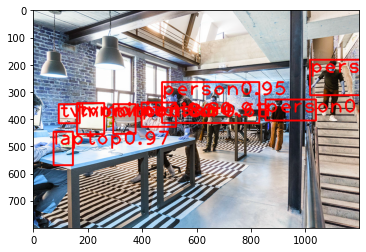

In [14]:
'''
for i in range(n_det):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = classes[class_ids[i]]
        cv2.rectangle(image, (x,y),(x+h,y+w),(255,0,0),5)
        cv2.putText(image,label,(x,y+50),cv2.FONT_HERSHEY_PLAIN,5,(255,0,0),5)
plt.imshow(image)     
'''
# or
for i in range(n_det):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = classes[class_ids[i]]
        c = str(confidences[i])
        cv2.rectangle(image, (x,y),(x+h,y+w),(255,0,0),5)
        cv2.putText(image,f'{label}{c[0:4]}',(x,y+50),cv2.FONT_HERSHEY_PLAIN,5,(255,0,0),5)
plt.imshow(image)